In [6]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import skimage 
from skimage import io

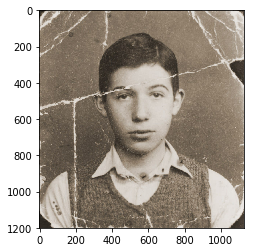

In [38]:
img = io.imread('dm4.jpg')
plt.imshow(img)
img = img[:,:,0]

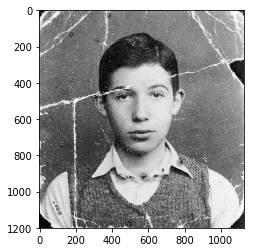

In [40]:
plt.imshow(img, cmap='gray')

In [41]:
dst = cv.fastNlMeansDenoisingColored(img,None,10,10,6,21)

fig, axes = plt.subplots(ncols = 2, figsize = (10,5))

axes[0].imshow(img)
axes[0].axis('off')

axes[1].imshow(dst)
axes[1].axis('off')

error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/photo/src/denoising.cpp:178: error: (-5:Bad argument) Type of input image should be CV_8UC3 or CV_8UC4! in function 'fastNlMeansDenoisingColored'


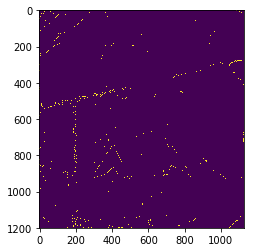

In [42]:
edges = cv.Canny(img,200,255)
plt.imshow(edges)

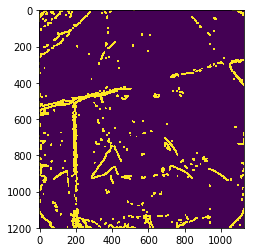

In [43]:
kernel = np.ones((5,5),np.uint8)
opening = cv.morphologyEx(edges, cv.MORPH_OPEN, kernel)
dilation = cv.dilate(edges,kernel,iterations = 2)
plt.imshow(dilation)

In [44]:
dest = cv.inpaint(dst,dilation,5,cv.INPAINT_TELEA)

(-0.5, 1127.5, 1199.5, -0.5)

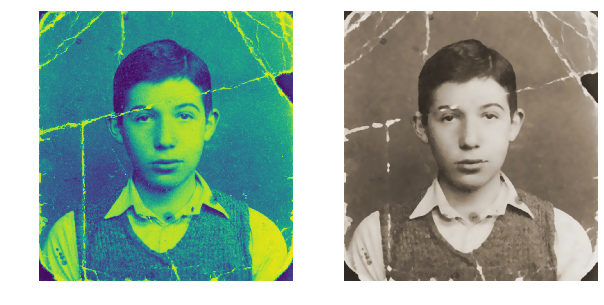

In [45]:
fig, axes = plt.subplots(ncols = 2, figsize = (10,5))

axes[0].imshow(img)
axes[0].axis('off')

axes[1].imshow(dest)
axes[1].axis('off')

In [46]:
from skimage.feature import canny 
from skimage.morphology import disk, binary_dilation, binary_erosion, remove_small_objects, watershed, opening, closing
from skimage.util import invert

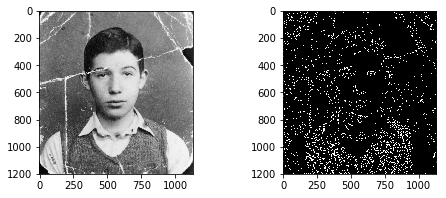

In [47]:
edges = canny(new_image)

fig, axes = plt.subplots(1,2, figsize=(8,3))

axes[0].imshow(img, cmap='gray')
axes[1].imshow(edges, cmap='gray')

In [48]:
from scipy.ndimage import binary_fill_holes

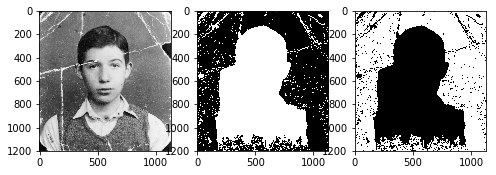

In [50]:
fill_coins = binary_erosion(binary_fill_holes(binary_dilation(edges, disk(1))), disk(1))


fig, axes = plt.subplots(1,3, figsize=(8,3))

axes[0].imshow(new_image, cmap='gray')
axes[1].imshow(fill_coins, cmap='gray')
axes[2].imshow(1-fill_coins, cmap='gray')

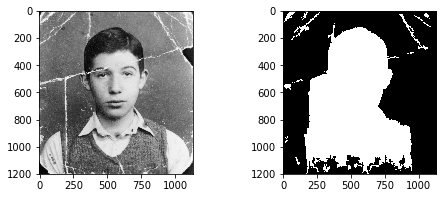

In [62]:
coins_cleaned = remove_small_objects(fill_coins,500)

fig, axes = plt.subplots(1,2, figsize=(8,3))

axes[0].imshow(img, cmap='gray')
axes[1].imshow(coins_cleaned, cmap='gray')

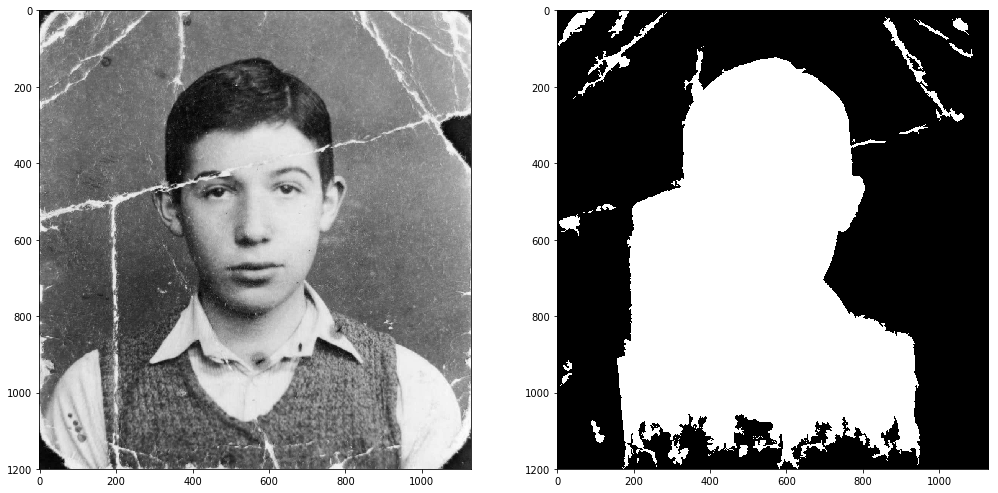

In [70]:
new = np.logical_xor(img,1-coins_cleaned)

fig, axes = plt.subplots(1,2, figsize=(17,10))

axes[0].imshow(img, cmap='gray')
axes[1].imshow(new, cmap='gray')